## Jelena CAP394


### The objectives of my study

Various paleoclimate studies confirmed that **Last Millennium** _(850 C.E -1850 C.E)_ is a period with important events and significant climate fluctuations such as the **Medieval Climate Anomaly(MCA)** and the **Little Ice Age(LIA)**.
Emerging scientific literature continues to report more evidence for the occurrence of both the **MCA** and **LIA** in South America.  
Therefore, it is crucial to examine climatic variability beyond the era of instrumental records through paleoclimate studies using **proxies** and modeling. 
Although, paleoclimate proxies may provide scarce, fragmented and local scale information, which limit the interpretation of past vegetational changes, they are unique evidences of past time and making **multiproxy compilation** could give us valuable insights. 
So my main task here is to look into several **speleothem** records from the South American and try to find signals or patterns
they have in common. 


### The Data

I have a set of 10 speleothem records all **CSV file format**. Each sheet corresponds to a cave in South America.
They are different in time span as well as in temporal resolution. 

You can find data [here](https://github.com/maxjel/Proxies/blob/master/botuvera.csv) and [here](https://github.com/maxjel/Proxies/blob/master/quelcaya.csv)

### Basic Data Analysis 

Let's take a look at Botuvera cave and Quelcaya cave data set. 

In [1]:
import pandas as pd


In [39]:
df_botuvera='botuvera.csv'
botuvera = pd.read_csv(df_botuvera,index_col=0,parse_dates=[0])

In [40]:
df_quelcaya = 'quelcaya.csv'
quelcaya = pd.read_csv(df_quelcaya,index_col=0,parse_dates=[0])

In [42]:
quelcaya.sample(5)


,d18O1
age1,
1326,-18.21
1338,-16.56
270,-17.34
1813,-18.34
1347,-18.02


In [43]:
botuvera.sample(5)

,d18O1
age1,
-6283.5,47.7
154.3,33.9
-6155.7,48.9
386.1,38.3
-4477.4,50.9


### Ploting data 

In [6]:
import matplotlib.pyplot as plt
from matplotlib import style
plt.style.use('ggplot')
import numpy as np

(300, 2000)

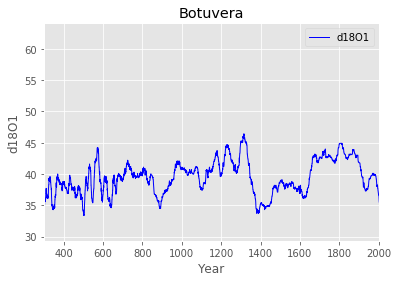

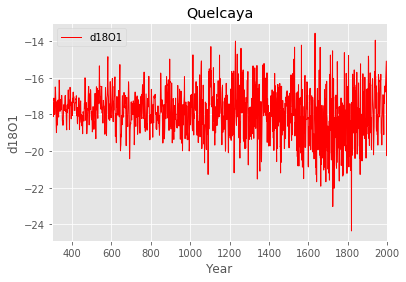

In [44]:
plot = botuvera.plot(title='Botuvera', lw=1, color='blue', marker='', markersize=3)
plot.set_xlabel("Year")
plot.set_ylabel("d18O1")
ax=plt.gca()
ax.set_xlim ([300,2000])

plot = quelcaya.plot(title='Quelcaya', lw=1, color='red', marker='', markersize=3)
plot.set_xlabel("Year")
plot.set_ylabel("d18O1")
ax=plt.gca()
ax.set_xlim ([300,2000])


### Panda 30yr rolling method

In [45]:
d1avg=pd.DataFrame(botuvera)
d2avg=pd.DataFrame(quelcaya)

calculating mean

In [46]:
d1avg ['MA_10'] = d1avg.d18O1.rolling(10).mean()
d2avg ['MA_30'] = d2avg.d18O1.rolling(30).mean()

ploting new variable 

In [48]:
botuvera.mean=pd.DataFrame(d1avg.MA_10)
quelcaya.mean=pd.DataFrame(d2avg.MA_30)

In [11]:
import matplotlib.pyplot as plt
from matplotlib import style
plt.style.use('ggplot')
import numpy as np

(300, 2000)

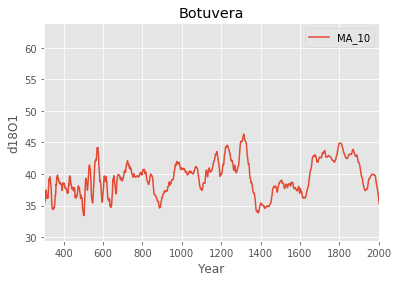

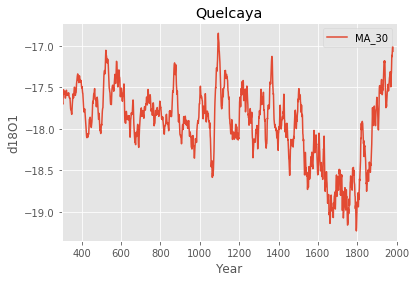

In [49]:
plot = botuvera.mean.plot(title='Botuvera')
plot.grid(True)
plot.set_xlabel("Year")
plot.set_ylabel("d18O1")

ax=plt.gca()
ax.set_xlim ([300,2000])

plot = quelcaya.mean.plot(title='Quelcaya')
plot.grid(True)
plot.set_xlabel("Year")
plot.set_ylabel("d18O1")
ax=plt.gca()
ax.set_xlim ([300,2000])



### Normalization

In [16]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt



In [52]:
def mapping(data1,feature):
    featureMap=dict()
    count=0
    for i in sorted(data1[feature].unique(),reverse=True):
        featureMap[i]=count
        count=count+1
    data1[feature]=data1[feature].map(featureMap)
    return data1

In [54]:
data1=mapping(botuvera,"d18O1")

In [55]:
data1f=((data1-data1.min())/(data1.max()-data1.min()))

In [56]:
data1f.sample(5)

,d18O1,MA_10
age1,,
263.9,0.882155,0.116746
-12.6,0.730640,0.263477
-6465.2,0.329966,0.637002
-566.6,0.629630,0.356619
-2211.0,0.710438,0.281021


(300, 2000)

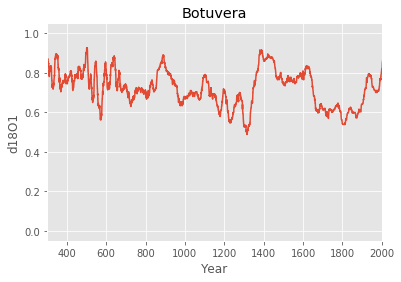

In [65]:
plot = data1f.d18O1.plot(title='Botuvera')
plot.grid(True)
plot.set_xlabel("Year")
plot.set_ylabel("d18O1")

ax=plt.gca()
ax.set_xlim ([300,2000])


In [59]:
data2=mapping(quelcaya,"d18O1")

In [60]:
data2f=((data2-data2.min())/(data2.max()-data2.min()))

In [61]:
data2f.sample(5)

,d18O1,MA_30
age1,,
1618,0.367589,0.319497
623,0.490119,0.545772
1024,0.308300,0.594270
1480,0.703557,0.531936
575,0.723320,0.787002


(300, 2000)

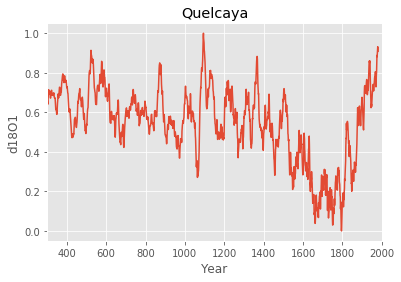

In [62]:
plot = data2f.MA_30.plot(title='Quelcaya')
plot.grid(True)
plot.set_xlabel("Year")
plot.set_ylabel("d18O1")

ax=plt.gca()
ax.set_xlim ([300,2000])


(300, 2000)

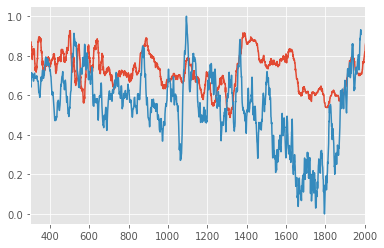

In [63]:
plt.plot(data1f.d18O1)
plt.plot(data2f.MA_30)
plt.xlim(300,2000)

